<a href="https://colab.research.google.com/github/Sujitha-2726/Stock_Price_Prediction_lstm/blob/main/Stock_Price_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance matplotlib scikit-learn tensorflow

In [ ]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
stock = "AAPL"
data = yf.download(stock, start="2015-01-01", end="2025-11-01")
data = data.reset_index()

/tmp/ipython-input-2227996225.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(2694, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2694 non-null   datetime64[ns]
 1   (Close, AAPL)   2694 non-null   float64       
 2   (High, AAPL)    2694 non-null   float64       
 3   (Low, AAPL)     2694 non-null   float64       
 4   (Open, AAPL)    2694 non-null   float64       
 5   (Volume, AAPL)  2694 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 126.4 KB


In [ ]:
data = data.reset_index()

In [ ]:
data.to_csv("aapl.csv", index=False)

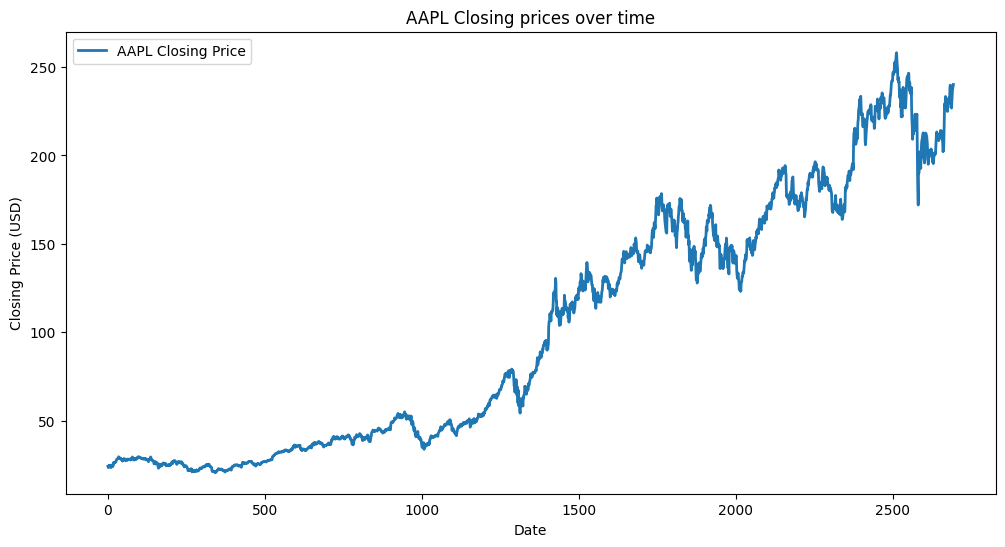

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{stock} Closing Price', linewidth=2)
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

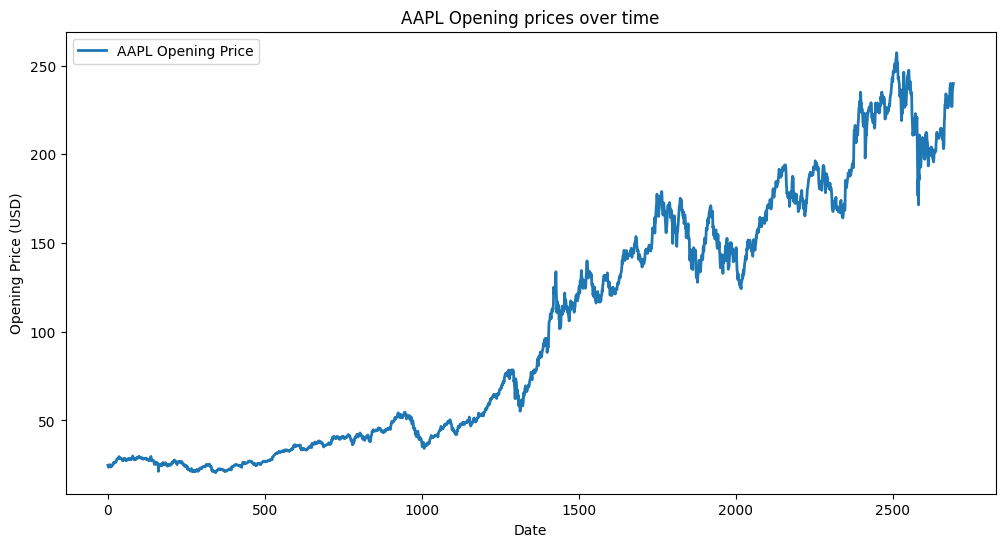

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label=f'{stock} Opening Price', linewidth=2)
plt.title(f'{stock} Opening prices over time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.show()

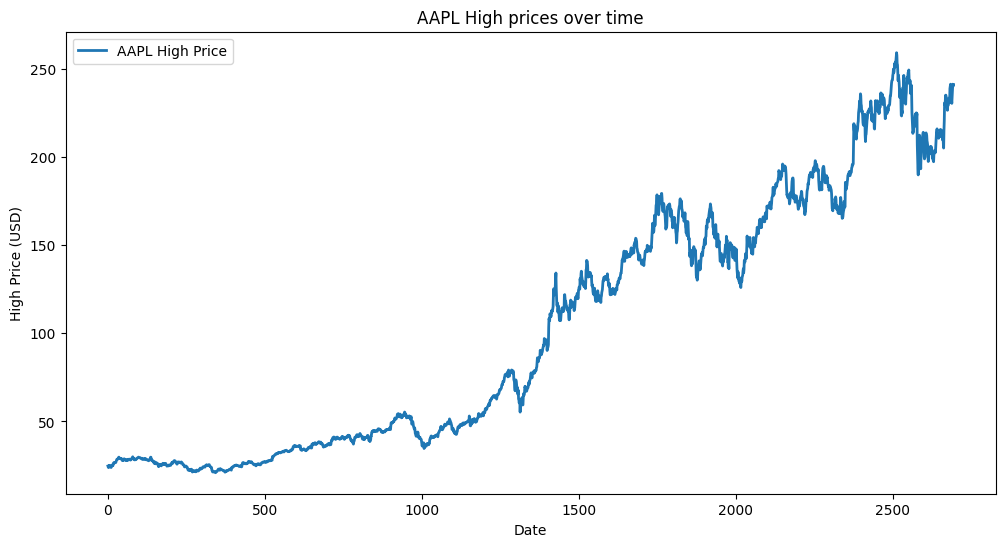

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['High'], label=f'{stock} High Price', linewidth=2)
plt.title(f'{stock} High prices over time')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.legend()
plt.show()

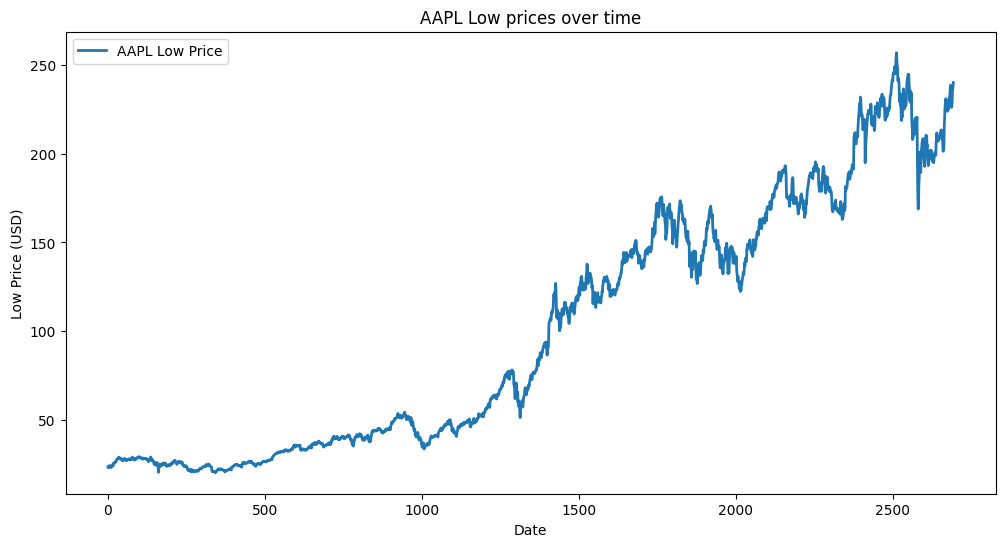

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Low'], label=f'{stock} Low Price', linewidth=2)
plt.title(f'{stock} Low prices over time')
plt.xlabel('Date')
plt.ylabel('Low Price (USD)')
plt.legend()
plt.show()

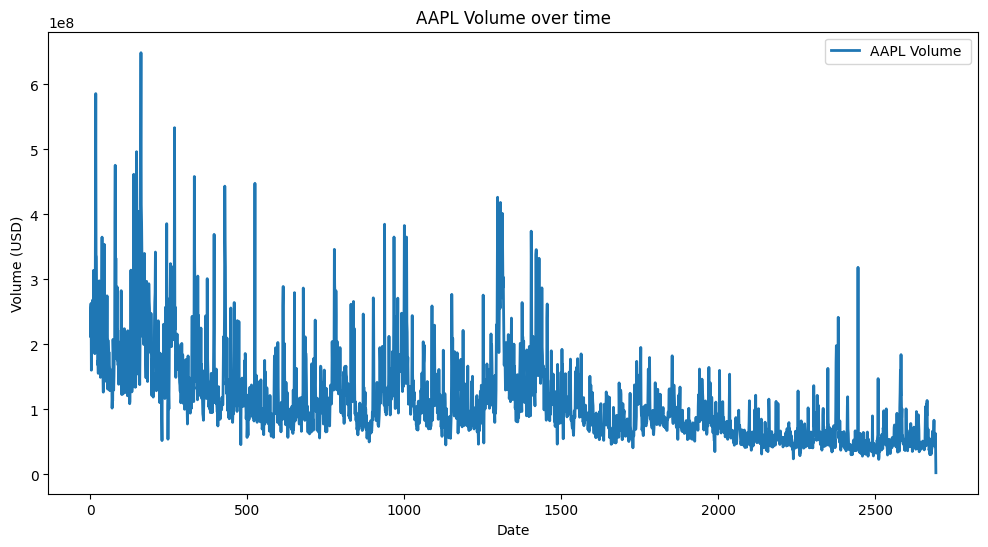

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label=f'{stock} Volume ', linewidth=2)
plt.title(f'{stock} Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.legend()
plt.show()

In [ ]:
# Candlestick
fig = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False, title=f'{stock} Candlestick Chart')
fig.show()

In [ ]:
# Training and Testing
data_training = pd.DataFrame(data['Close'][0:int(len(data) * 0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data) * 0.70):])

In [ ]:
# Scale the Training Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [ ]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Model Building
from keras.layers import Input, Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

# Use the Input layer as the first layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer without the input_shape argument
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - loss: 0.0818
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - loss: 0.0076
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 318ms/step - loss: 0.0054
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - loss: 0.0053
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - loss: 0.0061
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - loss: 0.0048
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0061
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - loss: 0.0055
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - loss: 0.0040
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0045
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0052
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0044
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - loss: 0.0043
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0036
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
# Preparing test data for prediction
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

input_data = scaler.fit_transform(final_df)
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)


In [ ]:
# Make Predictions
y_predicted = model.predict(x_test)
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step


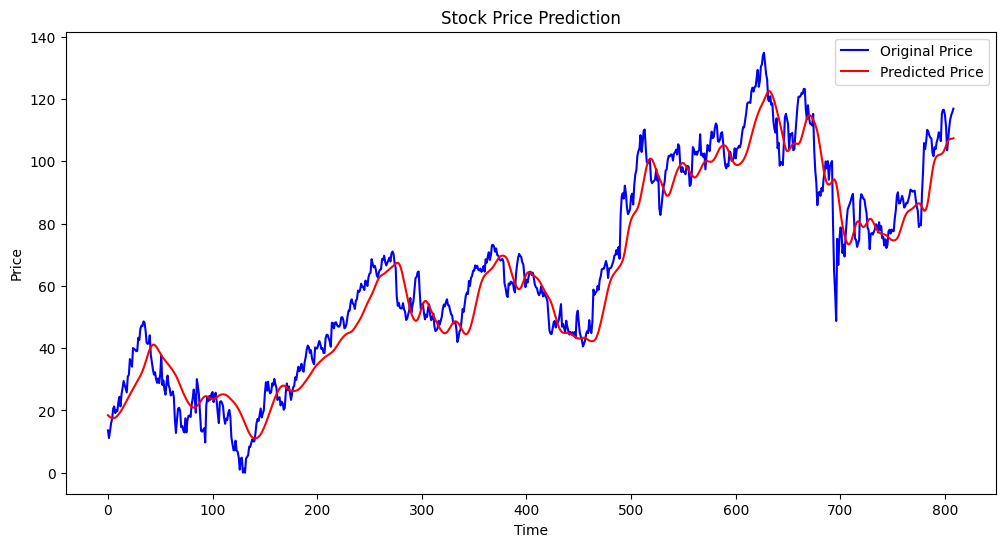

In [ ]:
# Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock_Price_Prediction1.keras')